In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

train = pd.read_csv("C:\\Users\\abuba\\OneDrive\\Documents\\trainT.csv")
test = pd.read_csv("C:\\Users\\abuba\\OneDrive\\Documents\\testT.csv")

print(train.head())
print(train.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

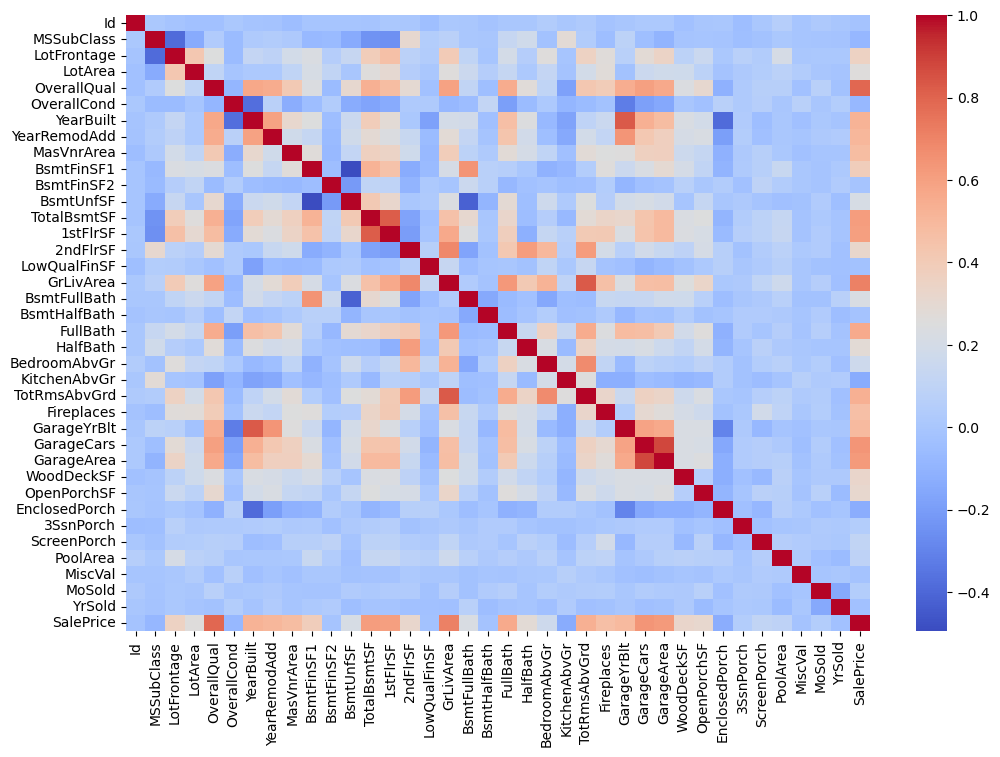

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


In [38]:

numeric_data = train.select_dtypes(include=[np.number])


corr = numeric_data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.show()

corr_target = corr["SalePrice"].sort_values(ascending=False)
print(corr_target.head(15))

In [40]:
# Target = SalePrice
y = train["SalePrice"]

features = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath"]
X = train[features]

# Train-Test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
model = DecisionTreeRegressor(random_state=42, max_depth=5)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_valid)

# Evaluation
print("MAE:", mean_absolute_error(y_valid, y_pred))
print("R² Score:", r2_score(y_valid, y_pred))

MAE: 25100.294161237267
R² Score: 0.8275419360924474


In [46]:
X_test = test[features]
test_preds = model.predict(X_test)


output = pd.DataFrame({"Id": test.Id, "SalePrice": test_preds})
output.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv
